In [23]:
#jupyter notebeook can be interface
#python modules lower case with underscore
#use constants='constant' at top of code to reference columns
#[DONE]add a .gitignore 

In [24]:
import pandas as pd
import os 
import folium
from folium import plugins

In [25]:
pwd

'/Users/hy/Documents/GitHub/Seattle-Food-Inspections/seattlefoodinspections'

In [26]:
inspection = pd.read_csv('./data/raw_data/Food_Establishment_Inspection.csv',low_memory=False)
inspection.head(5)

Name Program Identifier Inspection Date  \
0  @ THE SHACK, LLC       SHACK COFFEE      08/03/2019   
1  @ THE SHACK, LLC       SHACK COFFEE      10/03/2018   
2  @ THE SHACK, LLC       SHACK COFFEE      10/03/2018   
3  @ THE SHACK, LLC       SHACK COFFEE      04/02/2018   
4  @ THE SHACK, LLC       SHACK COFFEE      07/27/2017   

                        Description              Address     City Zip Code  \
0  Seating 0-12 - Risk Category III  2920 SW AVALON WAY   Seattle    98126   
1  Seating 0-12 - Risk Category III  2920 SW AVALON WAY   Seattle    98126   
2  Seating 0-12 - Risk Category III  2920 SW AVALON WAY   Seattle    98126   
3  Seating 0-12 - Risk Category III  2920 SW AVALON WAY   Seattle    98126   
4  Seating 0-12 - Risk Category III  2920 SW AVALON WAY   Seattle    98126   

            Phone   Longitude   Latitude  ... Inspection Score  \
0  (206) 938-5665 -122.370913  47.570425  ...              5.0   
1  (206) 938-5665 -122.370913  47.570425  ...             10.0   
2  (206) 938-5665 -122.370913  47.570425  ...             10.0   
3  (206) 938-5665 -122.370913  47.570425  ...              0.0   
4  (206) 938-5665 -122.370913  47.570425  ...              0.0   

  Inspection Result  Inspection Closed Business Violation Type  \
0      Satisfactory                       False           BLUE   
1      Satisfactory                       False           BLUE   
2      Satisfactory                       False           BLUE   
3          Complete                       False            NaN   
4      Satisfactory                       False            NaN   

                               Violation Description Violation Points  \
0  4100 - Warewashing facilities properly install...                5   
1  3400 - Wiping cloths properly used, stored, pr...                5   
2  4100 - Warewashing facilities properly install...                5   
3                                                NaN                0   
4                                                NaN                0   

  Business_ID  Inspection_Serial_Num Violation_Record_ID Grade  
0   PR0048053              DAAWCFJXT           IVAW6QGCN   1.0  
1   PR0048053              DA1RU2P4A           IVM00AWOV   1.0  
2   PR0048053              DA1RU2P4A           IVTPKYPPP   1.0  
3   PR0048053              DA34JMIOR                 NaN   1.0  
4   PR0048053              DADNXR5VS                 NaN   1.0  

[5 rows x 22 columns]

In [27]:
# convert dates in 'Inspection Date' to date time
inspection['Inspection Date']=pd.to_datetime(inspection['Inspection Date']) 

# sort by inspection date then remove duplicates
inspection = inspection.sort_values(by=['Inspection Date']).drop_duplicates(subset = ['Program Identifier', 'Address'], keep = 'last')

In [28]:
len(inspection)

12237

In [29]:
inspection_cleaned = inspection.dropna(subset = ['Longitude'])

In [30]:
inspection_cleaned = inspection.dropna(subset = ['Inspection Business Name'])

In [31]:
len(inspection_cleaned)

11705

In [32]:
inspection_cleaned = inspection_cleaned.dropna(subset = ['Grade'])

In [33]:
inspection_cleaned = inspection_cleaned.dropna(subset = ['Zip Code'])

In [34]:
len(inspection_cleaned)

8413

In [35]:
inspection_cleaned = inspection_cleaned.sort_values(by=['Inspection Date'])
inspection_cleaned.head(5)

Name  \
134890            MARRAKESH RESTAURANT   
126012                      LIL WOODYS   
72023                 EVERGREENS SALAD   
158017                      ON THE FLY   
25231   BELL HARBOR INT CONFERENCE CTR   

                                     Program Identifier Inspection Date  \
134890                             MARRAKESH RESTAURANT      2017-02-21   
126012                                       LIL WOODYS      2017-02-28   
72023                                  EVERGREENS SALAD      2017-02-28   
158017                                       ON THE FLY      2017-03-01   
25231   BELL HARBOR INTN'L - BANQUET KITCHEN - 2ND FLR.      2017-03-29   

                                Description             Address     City  \
134890   Seating 51-150 - Risk Category III       2334 2ND AVE   SEATTLE   
126012     Seating 0-12 - Risk Category III      1091 THOMAS ST  SEATTLE   
72023      Seating 0-12 - Risk Category III      1091 THOMAS ST  SEATTLE   
158017     Seating 0-12 - Risk Category III  300 WESTLAKE AVE N  SEATTLE   
25231   Seating 151-250 - Risk Category III    2211 ALASKAN WAY  Seattle   

       Zip Code           Phone   Longitude   Latitude  ... Inspection Score  \
134890    98121             NaN -122.346605  47.614803  ...              0.0   
126012    98109  (206) 650-0886 -122.336199  47.620613  ...              5.0   
72023     98109  (402) 639-8758 -122.336199  47.620613  ...             10.0   
158017    98109  (206) 728-8595 -122.338188  47.621094  ...              0.0   
25231     98121  (206) 441-6666 -122.349124  47.611096  ...              0.0   

       Inspection Result  Inspection Closed Business Violation Type  \
134890      Satisfactory                       False            NaN   
126012      Satisfactory                       False           BLUE   
72023     Unsatisfactory                       False            RED   
158017      Satisfactory                       False            NaN   
25231           Complete                       False            NaN   

                                    Violation Description Violation Points  \
134890                                                NaN                0   
126012  4100 - Warewashing facilities properly install...                5   
72023              0600 - Adequate handwashing facilities               10   
158017                                                NaN                0   
25231                                                 NaN                0   

       Business_ID  Inspection_Serial_Num Violation_Record_ID Grade  
134890   PR0069201              DALJ3KH8M                 NaN   2.0  
126012   PR0086254              DAJ3JY08D           IVFO5ISIE   1.0  
72023    PR0086352              DAYGBEHJH           IVXVGCFXZ   2.0  
158017   PR0084175              DA9PKKBZW                 NaN   2.0  
25231    PR0068143              DA40HXOPP                 NaN   1.0  

[5 rows x 22 columns]

In [36]:
# convert the data type of Zip Code to integer
inspection_cleaned['Zip Code']=inspection_cleaned['Zip Code'].astype(int)

In [37]:
# check all the data types 
inspection_cleaned.dtypes

Name                                  object
Program Identifier                    object
Inspection Date               datetime64[ns]
Description                           object
Address                               object
City                                  object
Zip Code                               int64
Phone                                 object
Longitude                            float64
Latitude                             float64
Inspection Business Name              object
Inspection Type                       object
Inspection Score                     float64
Inspection Result                     object
Inspection Closed Business            object
Violation Type                        object
Violation Description                 object
Violation Points                       int64
Business_ID                           object
Inspection_Serial_Num                 object
Violation_Record_ID                   object
Grade                                float64
dtype: obj

In [38]:
inspection_zips = inspection_cleaned[inspection_cleaned['Zip Code'].isin([98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121, 98122, 98125, 98126, 98133, 98134, 98136, 98144, 98146, 98154, 98164, 98174, 98177, 98178, 98195, 98199])]

In [39]:
inspection_zips.head(5)

Name  \
134890            MARRAKESH RESTAURANT   
126012                      LIL WOODYS   
72023                 EVERGREENS SALAD   
158017                      ON THE FLY   
25231   BELL HARBOR INT CONFERENCE CTR   

                                     Program Identifier Inspection Date  \
134890                             MARRAKESH RESTAURANT      2017-02-21   
126012                                       LIL WOODYS      2017-02-28   
72023                                  EVERGREENS SALAD      2017-02-28   
158017                                       ON THE FLY      2017-03-01   
25231   BELL HARBOR INTN'L - BANQUET KITCHEN - 2ND FLR.      2017-03-29   

                                Description             Address     City  \
134890   Seating 51-150 - Risk Category III       2334 2ND AVE   SEATTLE   
126012     Seating 0-12 - Risk Category III      1091 THOMAS ST  SEATTLE   
72023      Seating 0-12 - Risk Category III      1091 THOMAS ST  SEATTLE   
158017     Seating 0-12 - Risk Category III  300 WESTLAKE AVE N  SEATTLE   
25231   Seating 151-250 - Risk Category III    2211 ALASKAN WAY  Seattle   

        Zip Code           Phone   Longitude   Latitude  ... Inspection Score  \
134890     98121             NaN -122.346605  47.614803  ...              0.0   
126012     98109  (206) 650-0886 -122.336199  47.620613  ...              5.0   
72023      98109  (402) 639-8758 -122.336199  47.620613  ...             10.0   
158017     98109  (206) 728-8595 -122.338188  47.621094  ...              0.0   
25231      98121  (206) 441-6666 -122.349124  47.611096  ...              0.0   

       Inspection Result  Inspection Closed Business Violation Type  \
134890      Satisfactory                       False            NaN   
126012      Satisfactory                       False           BLUE   
72023     Unsatisfactory                       False            RED   
158017      Satisfactory                       False            NaN   
25231           Complete                       False            NaN   

                                    Violation Description Violation Points  \
134890                                                NaN                0   
126012  4100 - Warewashing facilities properly install...                5   
72023              0600 - Adequate handwashing facilities               10   
158017                                                NaN                0   
25231                                                 NaN                0   

       Business_ID  Inspection_Serial_Num Violation_Record_ID Grade  
134890   PR0069201              DALJ3KH8M                 NaN   2.0  
126012   PR0086254              DAJ3JY08D           IVFO5ISIE   1.0  
72023    PR0086352              DAYGBEHJH           IVXVGCFXZ   2.0  
158017   PR0084175              DA9PKKBZW                 NaN   2.0  
25231    PR0068143              DA40HXOPP                 NaN   1.0  

[5 rows x 22 columns]

In [40]:
len(inspection_zips)

4191

In [41]:
# associate color with inspection result 
inspection_cleaned['marker_color'] = pd.cut(inspection_cleaned['Grade'], bins=4, 
                              labels=['lightgreen', 'orange', 'red', 'black'])

In [42]:
# Create a map centered on Canlis in Seattle, WA
m = folium.Map(
        tiles='Stamen Toner',
        location=[47.6, -122.346742],
        zoom_start = 11
        )

# cluster points
# cluster points
marker_cluster = folium.plugins.MarkerCluster(options = {'maxClusterRadius':50, 
               'disableCusteringAtZoom':5, 
               'singleMarkerMode':False,
                'animate':True,
                'animateAddingMarkers':True,
                }).add_to(m)

# Add marker for each restaurant in the database
for i, r in inspection_cleaned.tail(1200).iterrows():
    folium.Marker(
        # pull lat and lon from entry and use as coordinates for the marker
        location=[r['Latitude'],r['Longitude']],
        # use the business name as the pop
        popup='Restaurant: '+str(r['Inspection Business Name'])+
               '<br>Rating: '+str(r['Inspection Result'])+
                '<br>Date: '+str(r['Inspection Date']),
        icon=folium.Icon(color=r['marker_color'])
    ).add_to(marker_cluster)

# Display m
m

In [43]:
import altair as alt
#alt.renderers.enable('notebook')

In [44]:
# remote geojson data object

# neighborhoods geojson
#url_geojson = 'https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/neighborhoods.geojson'

# Seattle zipcodes geojson
url_geojson = 'https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/zip-codes.geojson'

# King County zipcodes geojson
#url_geojson = 'https://opendata.arcgis.com/datasets/83fc2e72903343aabff6de8cb445b81c_2.geojson'

data_geojson_remote = alt.Data(url=url_geojson, format=alt.DataFormat(property='features',type='json'))

# interaction, select bar from historgram
multi = alt.selection_multi(encodings = ['x'],resolve = 'intersect')

# Seattle background
background = alt.Chart(url_geojson).mark_geoshape(
    stroke='white',
    fill='lightgray'
).properties(
    width=800,
    height=800)

# add a few restaurants
sorted10 = inspection_zips.head(5000)
restaurants = alt.Chart(sorted10).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    tooltip = ['Inspection Business Name','Grade'],
    color = 'Grade:N'
).transform_filter(multi)

# histogram of inspection results
hist = alt.Chart(sorted10).mark_bar().encode(
    x = 'Grade:N',
    y = 'count()',
    color = 'Grade:N')


hist_select = alt.layer(
    hist.add_selection(multi).encode(color=alt.value('lightgrey')),
    hist.transform_filter(multi)
)

background + restaurants | hist_select

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [45]:
# import census data to data frame
census = pd.read_csv('./data/clean_data/clean_census.csv')
census.head(10)

zipcode  Population  No_Married(%)  Widowed(%)  Divorced(%)  Separated(%)  \
0    83501       28808           52.0         6.7         13.5           1.1   
1    83822        1625           52.1         8.2         14.2           2.0   
2    83824         249           39.0         9.6         15.7           3.6   
3    83832        1196           66.9         2.6          9.4           0.2   
4    83851        1339           48.8         9.0         16.5           2.8   
5    83855        1625           56.5         7.6         10.6           1.2   
6    83870         268           35.4        11.2         14.6           1.5   
7    83872         528           72.3         4.5          7.6           0.0   
8    97031       15231           51.4         5.8         10.4           1.2   
9    97828        2610           56.6        10.5         13.7           1.5   

   Never_Married(%)  No_Married  Widowed  Divorced  Separated  Never_Married  \
0              26.7       14980     1930      3889        316           7691   
1              23.5         846      133       230         32            381   
2              32.1          97       23        39          8             79   
3              21.0         800       31       112          2            251   
4              22.9         653      120       220         37            306   
5              24.2         918      123       172         19            393   
6              37.3          94       30        39          4             99   
7              15.5         381       23        40          0             81   
8              31.3        7828      883      1584        182           4767   
9              17.6        1477      274       357         39            459   

   Number_Households  Percent_Distribution_Housesholds  \
0              14476                             14476   
1                799                               799   
2                 99                                99   
3                590                               590   
4                649                               649   
5                867                               867   
6                120                               120   
7                259                               259   
8               7227                              7227   
9               1417                              1417   

  Median_Income_Households  
0                    52285  
1                    45293  
2                    32292  
3                    64375  
4                    37216  
5                    49177  
6                    40536  
7                    99886  
8                    57655  
9                    47694

In [46]:
# merge inspection and census data by zip code
# first, rename column in census data set
census.rename(columns={'zipcode': 'Zip Code'}, inplace=True)
combined = pd.merge(inspection_zips, census, on='Zip Code', how='left')

In [47]:
combined.head(5)

Name  \
0            MARRAKESH RESTAURANT   
1                      LIL WOODYS   
2                EVERGREENS SALAD   
3                      ON THE FLY   
4  BELL HARBOR INT CONFERENCE CTR   

                                Program Identifier Inspection Date  \
0                             MARRAKESH RESTAURANT      2017-02-21   
1                                       LIL WOODYS      2017-02-28   
2                                 EVERGREENS SALAD      2017-02-28   
3                                       ON THE FLY      2017-03-01   
4  BELL HARBOR INTN'L - BANQUET KITCHEN - 2ND FLR.      2017-03-29   

                           Description             Address     City  Zip Code  \
0   Seating 51-150 - Risk Category III       2334 2ND AVE   SEATTLE     98121   
1     Seating 0-12 - Risk Category III      1091 THOMAS ST  SEATTLE     98109   
2     Seating 0-12 - Risk Category III      1091 THOMAS ST  SEATTLE     98109   
3     Seating 0-12 - Risk Category III  300 WESTLAKE AVE N  SEATTLE     98109   
4  Seating 151-250 - Risk Category III    2211 ALASKAN WAY  Seattle     98121   

            Phone   Longitude   Latitude  ... Separated(%) Never_Married(%)  \
0             NaN -122.346605  47.614803  ...          1.0             53.3   
1  (206) 650-0886 -122.336199  47.620613  ...          0.6             51.7   
2  (402) 639-8758 -122.336199  47.620613  ...          0.6             51.7   
3  (206) 728-8595 -122.338188  47.621094  ...          0.6             51.7   
4  (206) 441-6666 -122.349124  47.611096  ...          1.0             53.3   

   No_Married Widowed Divorced Separated Never_Married  Number_Households  \
0        5271     175     1847       159          8488              11339   
1        9019     674     2223       149         12916              15090   
2        9019     674     2223       149         12916              15090   
3        9019     674     2223       149         12916              15090   
4        5271     175     1847       159          8488              11339   

  Percent_Distribution_Housesholds Median_Income_Households  
0                            11339                    94813  
1                            15090                    95719  
2                            15090                    95719  
3                            15090                    95719  
4                            11339                    94813  

[5 rows x 36 columns]

In [48]:
census.dtypes

Zip Code                              int64
Population                            int64
No_Married(%)                       float64
Widowed(%)                          float64
Divorced(%)                         float64
Separated(%)                        float64
Never_Married(%)                    float64
No_Married                            int64
Widowed                               int64
Divorced                              int64
Separated                             int64
Never_Married                         int64
Number_Households                     int64
Percent_Distribution_Housesholds      int64
Median_Income_Households             object
dtype: object

In [49]:
# install geopandas - conda install geopandas, then import
import geopandas as gpd
import json

In [50]:
seattlezip_geojson = 'https://raw.githubusercontent.com/seattleio/seattle-boundaries-data/master/data/zip-codes.geojson'
gdf = gpd.read_file(seattlezip_geojson)
gdf.head()

ZCTA5CE10      AFFGEOID10 GEOID10     ALAND10   AWATER10  \
0     98136  8600000US98136   98136   5954030.0  2163632.0   
1     98144  8600000US98144   98144   8812564.0  4545367.0   
2     98109  8600000US98109   98109   5178198.0  1091119.0   
3     98195  8600000US98195   98195    180879.0    52419.0   
4     98199  8600000US98199   98199  10848073.0  3887509.0   

                                            geometry  
0  POLYGON ((-122.39869 47.55750, -122.38146 47.5...  
1  POLYGON ((-122.32054 47.59224, -122.31925 47.5...  
2  POLYGON ((-122.36054 47.65292, -122.35446 47.6...  
3  POLYGON ((-122.31221 47.65285, -122.30464 47.6...  
4  POLYGON ((-122.43694 47.66172, -122.42551 47.6...

In [51]:
combined.dtypes

Name                                        object
Program Identifier                          object
Inspection Date                     datetime64[ns]
Description                                 object
Address                                     object
City                                        object
Zip Code                                     int64
Phone                                       object
Longitude                                  float64
Latitude                                   float64
Inspection Business Name                    object
Inspection Type                             object
Inspection Score                           float64
Inspection Result                           object
Inspection Closed Business                  object
Violation Type                              object
Violation Description                       object
Violation Points                             int64
Business_ID                                 object
Inspection_Serial_Num          

In [52]:
# merge combined data with geojson
# first, rename zip code column in geojson data set and change to int
gdf.rename(columns={'ZCTA5CE10': 'Zip Code'}, inplace=True)
gdf['Zip Code']=gdf['Zip Code'].astype(int)
combined_geo = gdf.merge(census, on='Zip Code', how='inner')

In [53]:
combined_geo.head()

Zip Code      AFFGEOID10 GEOID10     ALAND10   AWATER10  \
0     98136  8600000US98136   98136   5954030.0  2163632.0   
1     98144  8600000US98144   98144   8812564.0  4545367.0   
2     98109  8600000US98109   98109   5178198.0  1091119.0   
3     98195  8600000US98195   98195    180879.0    52419.0   
4     98199  8600000US98199   98199  10848073.0  3887509.0   

                                            geometry  Population  \
0  POLYGON ((-122.39869 47.55750, -122.38146 47.5...       13878   
1  POLYGON ((-122.32054 47.59224, -122.31925 47.5...       26303   
2  POLYGON ((-122.36054 47.65292, -122.35446 47.6...       24984   
3  POLYGON ((-122.31221 47.65285, -122.30464 47.6...          52   
4  POLYGON ((-122.43694 47.66172, -122.42551 47.6...       17925   

   No_Married(%)  Widowed(%)  Divorced(%)  Separated(%)  Never_Married(%)  \
0           52.2         4.0         13.2           0.8              29.8   
1           39.1         4.5         11.8           1.9              42.7   
2           36.1         2.7          8.9           0.6              51.7   
3            0.0        21.2          0.0           0.0              78.8   
4           56.6         3.7          8.5           0.7              30.4   

   No_Married  Widowed  Divorced  Separated  Never_Married  Number_Households  \
0        7244      555      1831        111           4135               7461   
1       10284     1183      3103        499          11231              13021   
2        9019      674      2223        149          12916              15090   
3           0       11         0          0             40                  0   
4       10145      663      1523        125           5449               9518   

   Percent_Distribution_Housesholds Median_Income_Households  
0                              7461                    97673  
1                             13021                    71628  
2                             15090                    95719  
3                                 0                        0  
4                              9518                   103309

In [54]:
# transform back to geojson
chloro_json = json.loads(combined_geo.to_json())
chloro_data = alt.Data(values=chloro_json['features'])

In [55]:
# Seattle background
background = alt.Chart(chloro_data).mark_geoshape(
    fill='lightgray',
    stroke='white'
).encode(
    color='properties.Median_Income_Households:Q'
).properties(
    width=800,
    height=800)

background

<VegaLite 3 object>

If you see this message, it means the renderer has not been properly enabled
for the frontend that you are using. For more information, see
https://altair-viz.github.io/user_guide/troubleshooting.html


In [56]:
alt.data_transformers.enable('json')

DataTransformerRegistry.enable('json')

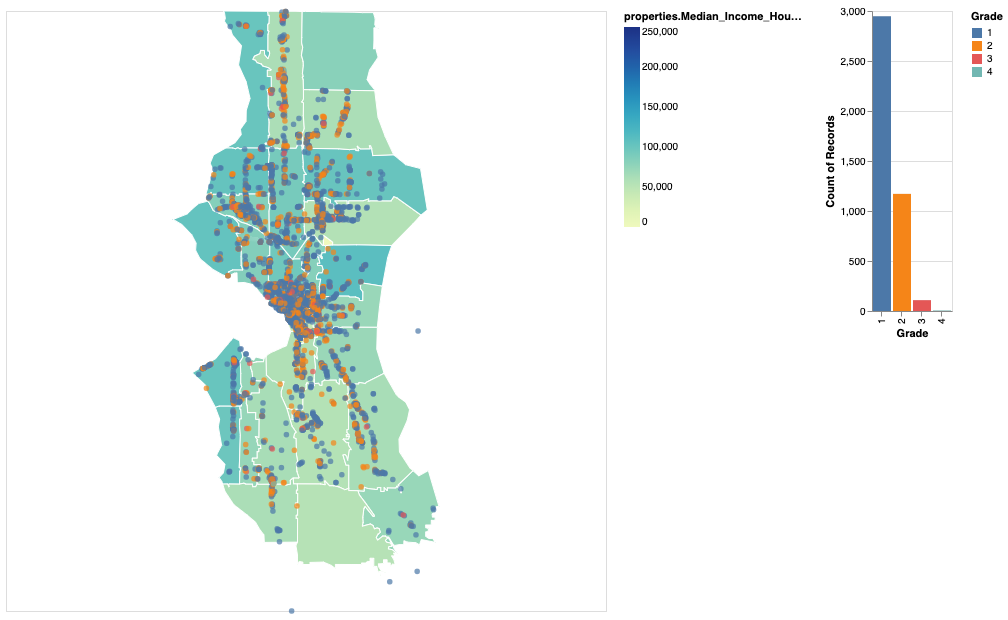

In [34]:
# interaction, select bar from historgram
multi = alt.selection_multi(encodings = ['x'],resolve = 'intersect')

# Seattle background
background = alt.Chart(chloro_data).mark_geoshape(
    fill='lightgray',
    stroke='white'
).encode(
    color='properties.Median_Income_Households:Q',
    tooltip=['properties.Zip Code:Q', 'properties.Median_Income_Households:Q']
).properties(
    width=600,
    height=600)

# add a few restaurants
sorted10 = inspection_zips.head(5000)
restaurants = alt.Chart(sorted10).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    tooltip=['Inspection Business Name','Grade'],
    color=alt.Color('Grade:N',legend=None)
).transform_filter(multi)

# histogram of inspection results
hist = alt.Chart(sorted10).mark_bar().encode(
    x = 'Grade:N',
    y = 'count()',
    color = 'Grade:N')


hist_select = alt.layer(
    hist.add_selection(multi).encode(color=alt.value('lightgrey')),
    hist.transform_filter(multi)
)

background + restaurants | hist_select

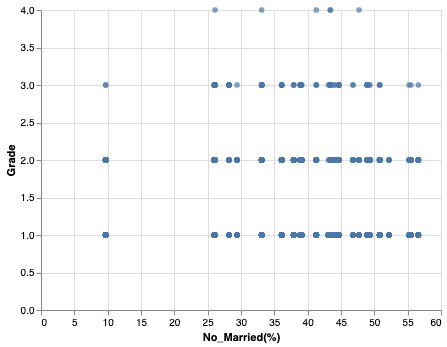

In [35]:
# exploring correlations
alt.Chart(combined).mark_circle().encode(
    x='No_Married(%):Q',
    y='Grade:Q',
    tooltip='Inspection Business Name'
)

In [51]:
# restructure as function, where one can input the column to reference for the chloropleth

def make_visual():
    # interaction, select bar from historgram
    multi = alt.selection_multi(encodings = ['x'],resolve = 'intersect')

    # Seattle background
    background = alt.Chart(chloro_data).mark_geoshape(
        fill='lightgray',
        stroke='white'
    ).encode(
        color=alt.Color('properties.Median_Income_Households:Q',
                        scale=alt.Scale(domain=(50000, 150000))),
        tooltip=['properties.Zip Code:Q', 'properties.Median_Income_Households:Q']
    ).properties(
        width=600,
        height=600)

    # add a few restaurants
    sorted10 = inspection_zips.head(5000)
    restaurants = alt.Chart(sorted10).mark_circle().encode(
        longitude='Longitude:Q',
        latitude='Latitude:Q',
        tooltip=['Inspection Business Name','Grade'],
        color=alt.Color('Grade:N',legend=None)
    ).transform_filter(multi)

    # histogram of inspection results
    hist = alt.Chart(sorted10).mark_bar().encode(
        x = 'Grade:N',
        y = 'count()',
        color = 'Grade:N')


    hist_select = alt.layer(
        hist.add_selection(multi).encode(color=alt.value('lightgrey')),
        hist.transform_filter(multi)
    )

    return background + restaurants | hist_select

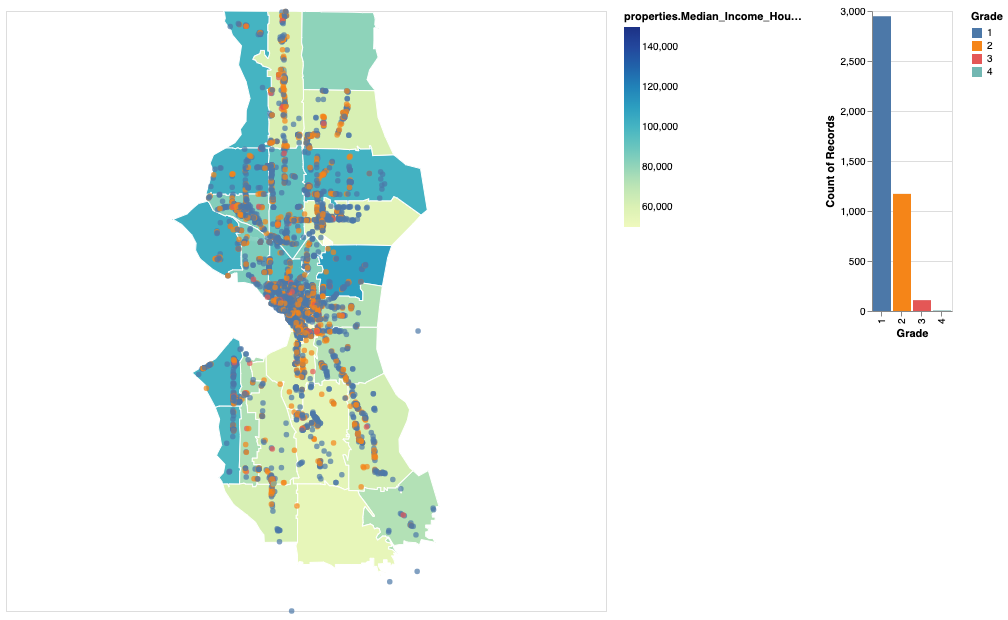

In [52]:
make_visual()